In [1]:
%matplotlib inline

import os
import time
import datetime as dt 

import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy.interpolate import spline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as dates

from mpl_toolkits.basemap import Basemap

import netCDF4 as nc
from netCDF4 import num2date,date2num
from six.moves import urllib # six is for Python 2/3 compatibility

#from pycurrents.codas import to_day
#from pycurrents.num import rangeslice
#from pycurrents.num import eof
# https://currents.soest.hawaii.edu/ocn_data_analysis/installation.html

In [3]:
from netCDF4 import num2date,date2num

In [4]:
pc1 = -np.genfromtxt('pc1.txt', delimiter = ',')
def yearly_time_axis(dvolc, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc)
    time = [dt.datetime(1951, 1, 15)]
    #time = [dt.datetime(10, 1, 15)]
    for i in range(1, len(dvolc)):
        y = time[i - 1].year
        y += 1
        time.append(dt.datetime(y, 1, 15))
    time = np.array(time)

    return time
yeartime = yearly_time_axis(pc1)
# smoothing based on a moving average box
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

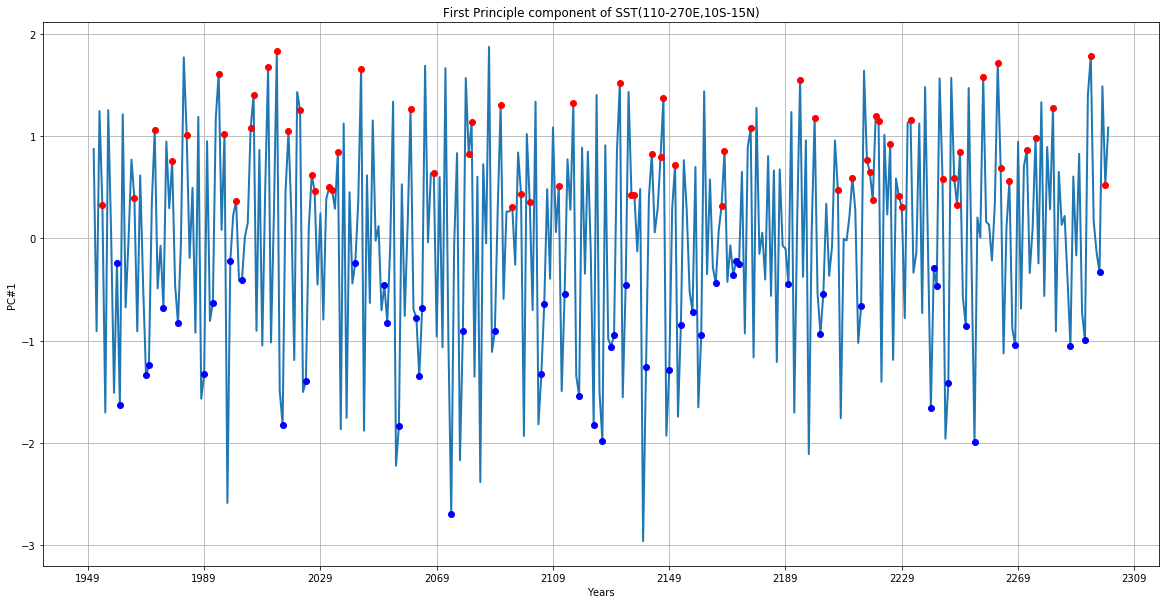

In [16]:
elnino_years = np.zeros(100)
lanina_years = np.zeros(60)
m=0
n=0
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(yeartime,pc1, lw=2)
#plt.plot(yeartime, smooth(pdo,12), lw=2)
for i in range(pc1.shape[0]-2):
    if np.sum(np.sign([pc1[i], pc1[i+1]]))==2:
        if pc1[i+1]>0.3:
            plt.plot(yeartime[i+1], pc1[i+1], "--ro")
            elnino_years[m] = i
            m = m + 1 
#    if np.sum(np.sign([pc1[i], pc1[i+1], pc1[i+2]]))==-3:
    if np.sum(np.sign([pc1[i], pc1[i+1]]))==-2:
        if pc1[i+1]<-0.2:
            plt.plot(yeartime[i+1], pc1[i+1], "--bo")
            lanina_years[n] = i
            n = n + 1
plt.title('First Principle component of SST(110-270E,10S-15N)')
plt.xlabel('Years')
plt.ylabel('PC#1')
plt.savefig('identifying_restarts.pdf')

In [21]:
for i in range(54):
    print(yeartime[int(elnino_years[i])])
    

1953-01-15 00:00:00
1964-01-15 00:00:00
1971-01-15 00:00:00
1977-01-15 00:00:00
1982-01-15 00:00:00
1993-01-15 00:00:00
1995-01-15 00:00:00
1999-01-15 00:00:00
2004-01-15 00:00:00
2005-01-15 00:00:00
2010-01-15 00:00:00
2013-01-15 00:00:00
2017-01-15 00:00:00
2021-01-15 00:00:00
2025-01-15 00:00:00
2026-01-15 00:00:00
2031-01-15 00:00:00
2032-01-15 00:00:00
2034-01-15 00:00:00
2042-01-15 00:00:00
2059-01-15 00:00:00
2067-01-15 00:00:00
2079-01-15 00:00:00
2080-01-15 00:00:00
2090-01-15 00:00:00
2094-01-15 00:00:00
2097-01-15 00:00:00
2100-01-15 00:00:00
2110-01-15 00:00:00
2115-01-15 00:00:00
2131-01-15 00:00:00
2135-01-15 00:00:00
2136-01-15 00:00:00
2142-01-15 00:00:00
2145-01-15 00:00:00
2146-01-15 00:00:00
2150-01-15 00:00:00
2166-01-15 00:00:00
2167-01-15 00:00:00
2176-01-15 00:00:00
2193-01-15 00:00:00
2198-01-15 00:00:00
2206-01-15 00:00:00
2211-01-15 00:00:00
2216-01-15 00:00:00
2217-01-15 00:00:00
2218-01-15 00:00:00
2219-01-15 00:00:00
2220-01-15 00:00:00
2224-01-15 00:00:00


In [19]:
for i in range(52):
    print(yeartime[int(lanina_years[i])])

1958-01-15 00:00:00
1959-01-15 00:00:00
1968-01-15 00:00:00
1969-01-15 00:00:00
1974-01-15 00:00:00
1979-01-15 00:00:00
1988-01-15 00:00:00
1991-01-15 00:00:00
1997-01-15 00:00:00
2001-01-15 00:00:00
2015-01-15 00:00:00
2023-01-15 00:00:00
2040-01-15 00:00:00
2050-01-15 00:00:00
2051-01-15 00:00:00
2055-01-15 00:00:00
2061-01-15 00:00:00
2062-01-15 00:00:00
2063-01-15 00:00:00
2073-01-15 00:00:00
2077-01-15 00:00:00
2088-01-15 00:00:00
2104-01-15 00:00:00
2105-01-15 00:00:00
2112-01-15 00:00:00
2117-01-15 00:00:00
2122-01-15 00:00:00
2125-01-15 00:00:00
2128-01-15 00:00:00
2129-01-15 00:00:00
2133-01-15 00:00:00
2140-01-15 00:00:00
2148-01-15 00:00:00
2152-01-15 00:00:00
2156-01-15 00:00:00
2159-01-15 00:00:00
2164-01-15 00:00:00
2170-01-15 00:00:00
2171-01-15 00:00:00
2172-01-15 00:00:00
2189-01-15 00:00:00
2200-01-15 00:00:00
2201-01-15 00:00:00
2214-01-15 00:00:00
2238-01-15 00:00:00
2239-01-15 00:00:00
2240-01-15 00:00:00
2244-01-15 00:00:00
2250-01-15 00:00:00
2253-01-15 00:00:00


In [15]:
if np.sum(np.sign([5., 4.5]))==0:
    print('true')
else:
    print('false')

false


In [19]:
i=0
if np.sum(np.sign([pc1[i], pc1[i+1], pc1[i+2]]))==3:
    print('true')
else:
    print('false')

false


In [2]:
import xarray as xr

In [4]:
data_dir = 'sst_ocean_1951_2300_yearmean_1_pacific.nc'
ds_sst = xr.open_dataset(data_dir)

In [8]:
sst_year = ds_sst.sel(xt_ocean=slice(210,270)).sel(yt_ocean=slice(-5,5)).mean(dim='xt_ocean').mean(dim='yt_ocean')

In [11]:
sst_year.sel(time='1951-12-31').values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (time: 1)
Coordinates:
  * time     (time) object 1951-12-31 12:00:00
Data variables:
    sst      (time) float32 25.482439>